In [3]:
import pandas as pd
from IPython.display import clear_output
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import time

In [4]:
from tqdm import tqdm, tqdm_notebook


In [6]:
from os import listdir
from os.path import isfile, join
mypath = r'F:\Documents\VU\KR\Sudoku_solver_group3\Human_solve_sudokus'
ids = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f))]

In [7]:
len(ids), len(onlyfiles)

(31, 31)

In [8]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, r'F:\Documents\VU\KR\Sudoku_solver_group3')
from sudoku_heuristics import heuristic_list
from dpll import *

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
heuristic_list

['RANDOM',
 'DLCS',
 'DLIS',
 'JEROSLOW_WANG',
 'JEROSLOW_WANG_TWO_SIDED',
 'DLIS_negated']

In [18]:
def runOnExamples(files,ids,rule_path =  r'F:\Documents\VU\KR\Sudoku_solver_group3\sudoku_rules_DIMACS.txt', 
                  write=None):
    results = []
        
    for file,_id in tqdm(zip(files,ids)):
        print(_id)
        result = testOnAllHueristics(file, rule_path, _id = _id)
        results = results+result
        if write:
            df = pd.DataFrame(result)
            df.to_csv(write, mode='a', header=False,index=False)
    return(results)

In [19]:
def testOnAllHueristics(problem_path, rule_path,
                       hueristics = heuristic_list, _id = 'example'):
    results = []
    for hueristic in tqdm(hueristics):
        start = time.time()
        solver,_,stats = run_dpll(problem_path , rule_path, 
         heuristic = hueristic, 
         verbose= False, draw=False, show_stats=False, output_to_file=False)
        end = time.time() - start
        stats['solve_time'] = end
        stats['result'] = solver.result
        stats['id'] = _id
        stats['heuristic'] = hueristic
        results.append(stats)
        clear_output()
    return(results)

In [20]:
results = runOnExamples(onlyfiles, ids = ids, write=None)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.11s/it]
31it [04:18,  8.34s/it]


In [48]:
df = pd.DataFrame(results)

In [49]:
df['human_difficulty'] = df['id'].apply(lambda x : x.split('_')[0])

In [50]:
df['avg_human_solve_time'] = df['id'].apply(lambda x : int(x.split('_')[2].split('.')[0])*60)

In [55]:
temp = []
for i,j in zip(onlyfiles,ids):
    a = get_dimacs(sudoku_file_path = i,
              rules_path=None)
    cnf = dimacs_to_cnf(a)
#     print('', end='\r')
#     for n in range(len(heuristic_list)):
    _ = {'id':j,'n_knowns':len(cnf)}
    temp.append(_)
clear_output()

In [56]:
pd.DataFrame(temp)['id'].nunique(), df['id'].nunique()

(31, 31)

In [57]:
_df = df.merge(pd.DataFrame(temp), on='id')
len(_df)

186

In [58]:
_df

,n_iterations,initial_n_cnf,initial_n_literal,avg_n_cnf,avg_n_literal,avg_n_ratio,mode_n_cnf,mode_n_literal,mode_n_ratio,median_n_cnf,...,ratio_of_avgs,ratio_of_modes,ratio_of_medians,solve_time,result,id,heuristic,human_difficulty,avg_human_solve_time,n_knowns
0,3,12013,26269,1357.000000,376.000000,3.609043,1357.0,376.0,3.609043,1357.0,...,3.609043,3.609043,3.609043,0.808834,True,diabolical_0409_25.txt,RANDOM,diabolical,1500,25
1,80,12013,26269,857.700000,291.100000,2.902717,640.0,256.0,2.986395,806.0,...,2.946410,2.500000,2.848057,1.842106,True,diabolical_0409_25.txt,DLCS,diabolical,1500,25
2,537,12013,26269,690.266667,265.214815,2.555839,512.0,226.0,2.400000,637.5,...,2.602670,2.265487,2.470930,7.148779,True,diabolical_0409_25.txt,DLIS,diabolical,1500,25
3,512,12013,26269,693.810078,266.294574,2.560588,576.0,248.0,2.400000,641.5,...,2.605423,2.322581,2.486434,5.135724,True,diabolical_0409_25.txt,JEROSLOW_WANG,diabolical,1500,25
4,512,12013,26269,693.810078,266.294574,2.560588,576.0,248.0,2.400000,641.5,...,2.605423,2.322581,2.486434,5.482492,True,diabolical_0409_25.txt,JEROSLOW_WANG_TWO_SIDED,diabolical,1500,25
5,114,12013,26269,743.052632,268.912281,2.700860,512.0,256.0,2.986395,695.0,...,2.763178,2.000000,2.632576,2.515266,True,diabolical_0409_25.txt,DLIS_negated,diabolical,1500,25
6,17,12012,26268,754.750000,252.250000,2.980488,739.0,256.0,2.984375,756.0,...,2.992071,2.886719,2.964706,0.923132,True,diabolical_0609_28.txt,RANDOM,diabolical,1680,24
7,20,12012,26268,794.600000,267.000000,2.974070,800.0,258.0,2.985075,793.0,...,2.976030,3.100775,2.970037,1.012372,True,diabolical_0609_28.txt,DLCS,diabolical,1680,24
8,80,12012,26268,589.133333,226.533333,2.558416,512.0,256.0,2.985075,583.0,...,2.600647,2.000000,2.512931,1.511924,True,diabolical_0609_28.txt,DLIS,diabolical,1680,24
9,62,12012,26268,653.176471,243.000000,2.668944,513.0,256.0,2.985075,642.5,...,2.687969,2.003906,2.644033,1.431356,True,diabolical_0609_28.txt,JEROSLOW_WANG,diabolical,1680,24


In [60]:
_df.sort_values(by='id').to_csv('human_solved.csv', index=False)

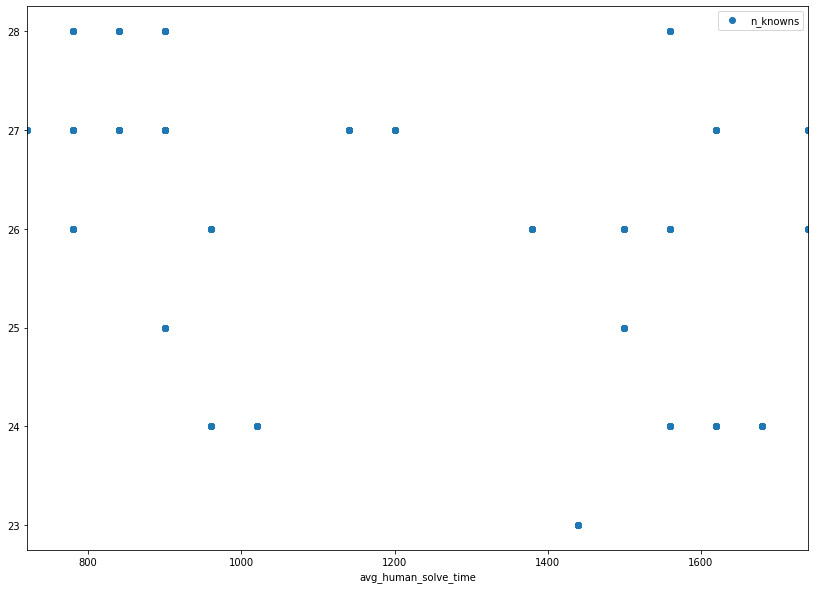

In [61]:
_df.plot(y='n_knowns', x='avg_human_solve_time', style = 'o', figsize = (14,10))

In [9]:
# new_df = pd.read_csv('human_solved.csv')

In [36]:
# new_df = df.sort_values(by = 'id')

In [37]:
# new_df.to_csv('human_solved.csv', index=False)

In [38]:
# new_df.columns = columns = ['n_iterations', 'initial_n_cnf', 'initial_n_literal', 'avg_n_cnf',
#        'avg_n_literal', 'avg_n_ratio', 'mode_n_cnf', 'mode_n_literal',
#        'mode_n_ratio', 'median_n_cnf', 'median_n_literal', 'median_n_ratio',
#        'ratio_of_avgs', 'ratio_of_modes', 'ratio_of_medians', 'result', 'id',
#        'heuristic']

In [62]:
for hr in _df['human_difficulty'].unique():
    temp  = _df[df['human_difficulty'] == hr]
    print(hr, temp['n_knowns'].mean())

diabolical 25.333333333333332
gentle 27.5
moderate 26.46153846153846
tough 26.4


In [66]:
for hr in heuristic_list:
    temp  = _df[_df['heuristic'] == hr]
    print(hr, temp['n_iterations'].mean())

RANDOM 5.419354838709677
DLCS 23.903225806451612
DLIS 77.41935483870968
JEROSLOW_WANG 96.38709677419355
JEROSLOW_WANG_TWO_SIDED 96.38709677419355
DLIS_negated 37.12903225806452


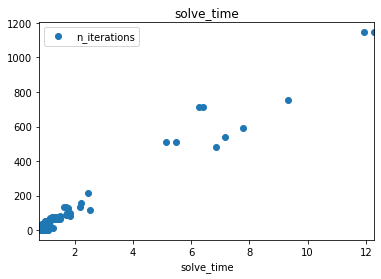

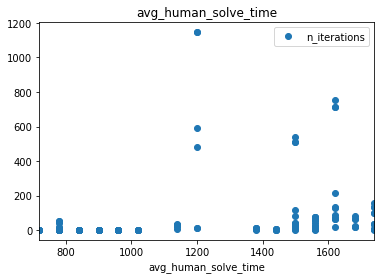

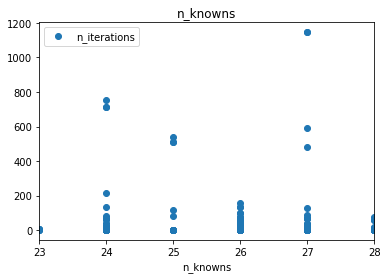

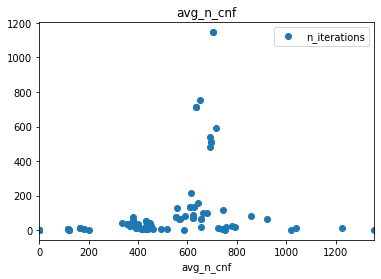

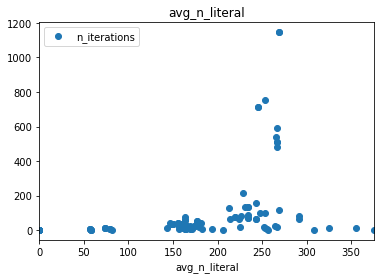

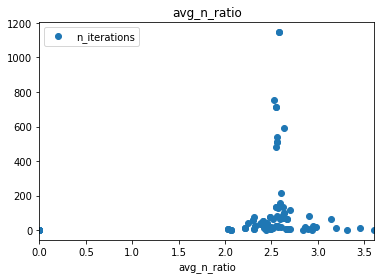

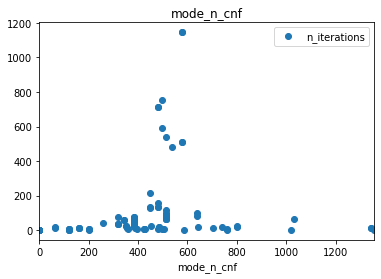

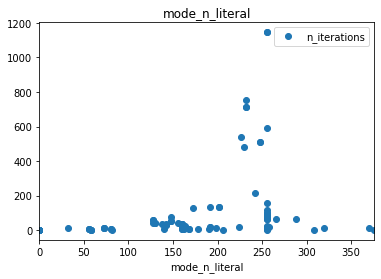

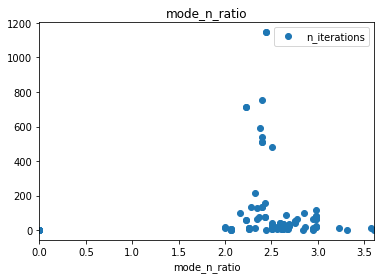

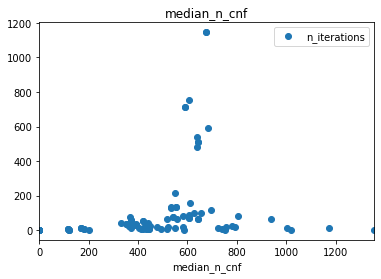

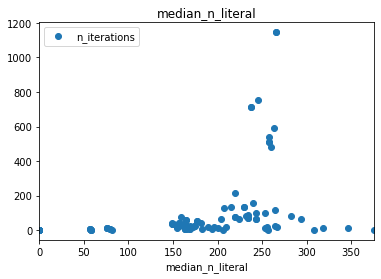

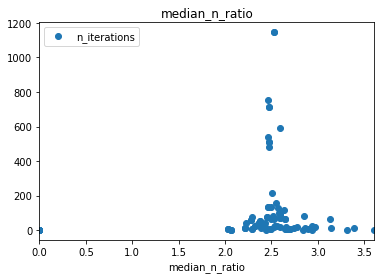

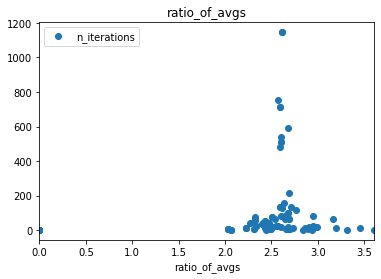

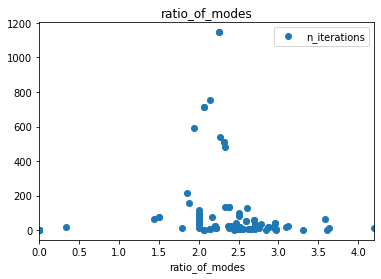

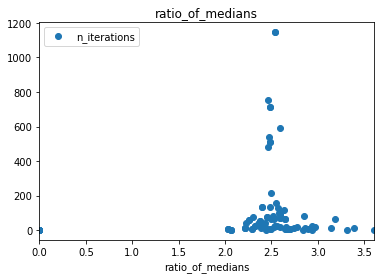

In [67]:
for col in ['solve_time', 'avg_human_solve_time', 'n_knowns' ,'avg_n_cnf',
       'avg_n_literal', 'avg_n_ratio', 'mode_n_cnf', 'mode_n_literal',
       'mode_n_ratio', 'median_n_cnf', 'median_n_literal', 'median_n_ratio',
       'ratio_of_avgs', 'ratio_of_modes', 'ratio_of_medians', ]:
    _df.plot(y='n_iterations', x=col, style='o', title=col)